### Context
Data has been collected from different hospitals, community clinics, maternal health cares through the IoT based risk monitoring system.

- Age: Age in years when a woman is pregnant.
- SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
- HeartRate: A normal resting heart rate in beats per minute.
- Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

### Acknowledgements
Relevant Papers:

1. Ahmed M., Kashem M.A., Rahman M., Khatun S. (2020) Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT). In: Kasruddin Nasir A. et al. (eds) InECCE2019. Lecture Notes in Electrical Engineering, vol 632. Springer, Singapore. [Web Link]

2. IoT based Risk Level Prediction Model for Maternal Health Care in the Context of Bangladesh, STI-2020, [under publication in IEEE]


### Inspiration
Which health conditions are the strongest indications for health risks during pregnancy?

### Data Source

Data was sourced from [Kaggle](https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
df = pd.read_csv('MaternalHealthRisk.csv')
print("Data imported successfully")

Data imported successfully


In [3]:
# inspect dataframe by printing out the first 5 rows
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
# display all columns for better visibility
pd.set_option('display.max_columns', None)

In [5]:
# explore top 5 and bottom 5 data (full columns)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [6]:
# check the shape of the data
df.shape

(1014, 7)

In [7]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [8]:
# Checking for the null value.
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [9]:
# return a total count for each RiskLevel in the dataset
df.RiskLevel.value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [11]:
# check the datatype counts of the dataset
df.dtypes.value_counts()

int64      4
float64    2
object     1
dtype: int64

In [12]:
# number of unique values in each features
df.nunique()

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

## Exploratory Data Analysis

In [10]:
# statistical summary
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


### visualize the distribution of the numerical variables

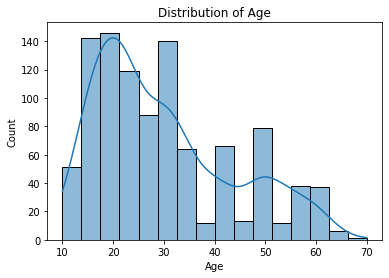

In [13]:
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

In [32]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [33]:
# Assign age distribution to a new column
# Define the conditions and corresponding designations
conditions = [
    df['Age'] <= 12,
    df['Age'] <= 17,
    df['Age'] <= 44,
    df['Age'] <= 55,
    df['Age'] <= 64
]
designations = [
    'Children',
    'Adolescents',
    'Pre-menopausal Adults',
    'Menopausal Adults',
    'Post-menopausal Adults'
]

# Use numpy.select() to create the new column
df['AgeDist'] = np.select(conditions, designations, default='Older adults')

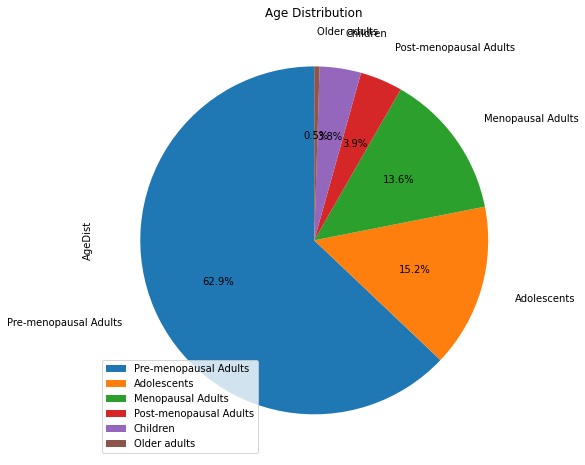

In [37]:
# Count the frequency of each value in the 'AgeDist' column
age_dist_counts = df['AgeDist'].value_counts()

# Create a pie chart of the frequency counts
age_dist_counts.plot.pie(autopct='%1.1f%%', startangle=90, labeldistance=1.2, figsize=(8, 8), legend=True)

# Set the title of the chart
plt.title('Age Distribution')

# Show the chart
plt.show()

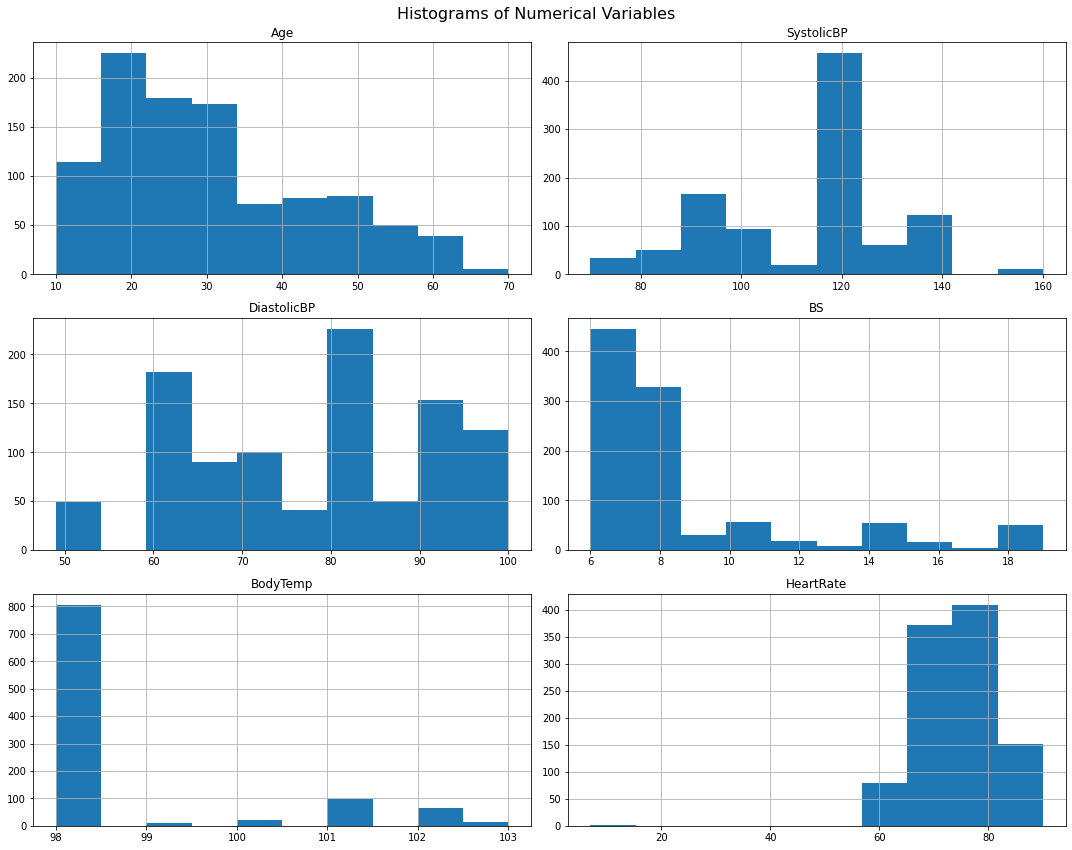

In [42]:
# Select only the numerical columns
num_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Plot histograms for all numerical columns
df[num_cols].hist(bins=10, figsize=(15, 12))

# Add titles and axis labels
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

### visualize the relationship between the numerical variables and the target variable

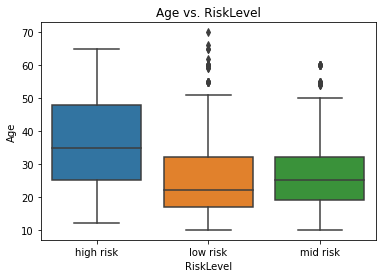

In [19]:

sns.boxplot(x='RiskLevel', y='Age', data=df)
plt.title('Age vs. RiskLevel')
plt.show()

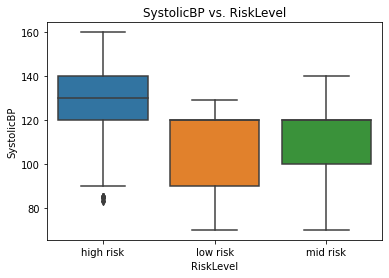

In [20]:
sns.boxplot(x='RiskLevel', y='SystolicBP', data=df)
plt.title('SystolicBP vs. RiskLevel')
plt.show()

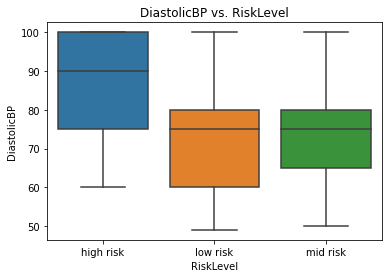

In [21]:
sns.boxplot(x='RiskLevel', y='DiastolicBP', data=df)
plt.title('DiastolicBP vs. RiskLevel')
plt.show()

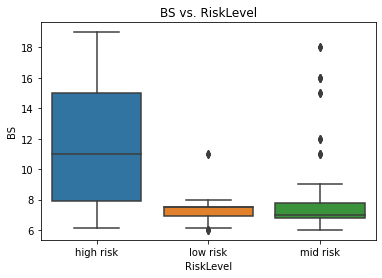

In [22]:
sns.boxplot(x='RiskLevel', y='BS', data=df)
plt.title('BS vs. RiskLevel')
plt.show()

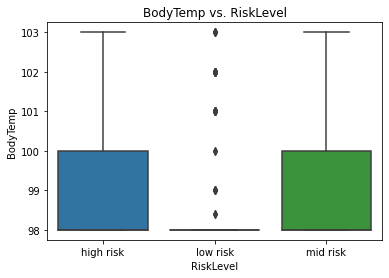

In [23]:
sns.boxplot(x='RiskLevel', y='BodyTemp', data=df)
plt.title('BodyTemp vs. RiskLevel')
plt.show()

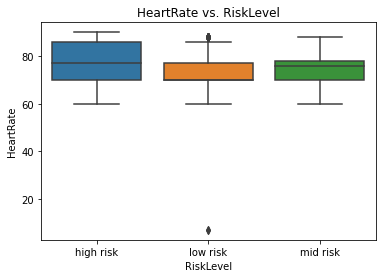

In [24]:
sns.boxplot(x='RiskLevel', y='HeartRate', data=df)
plt.title('HeartRate vs. RiskLevel')
plt.show()

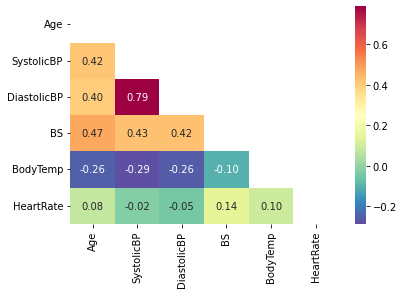

In [30]:
# correlation analysis
corrmat = df.corr()
top_corr_features = corrmat.index
mask= np.triu(top_corr_features)
plt.figure(figsize=(6,4))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True, fmt='.2f', mask=mask, cmap='Spectral_r');

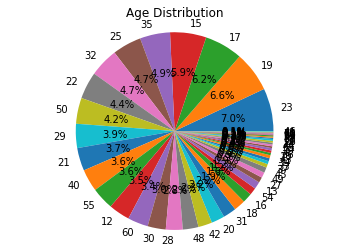

In [31]:
# Count the number of people in each age group
age_counts = df['Age'].value_counts()

# Create a pie chart
labels = age_counts.index.tolist()
sizes = age_counts.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.axis('equal')
plt.show()

In [ ]:
# outlier detection

## Modeling